# cf-python exercises 3
----

## Statistical collapses

In [1]:
# import the cf package
import cf

In [2]:
# Read the field from file ncas_data/IPSL-CM5A-LR_r1i1p1_tas_n96_rcp45_mnth.nc
f = cf.read('ncas_data/IPSL-CM5A-LR_r1i1p1_tas_n96_rcp45_mnth.nc')[0]
f

<CF Field: air_temperature(time(120), latitude(145), longitude(192)) K>

https://ncas-cms.github.io/cf-python/analysis.html#statistical-collapses

Field: air_temperature (ncvar%tas)
----------------------------------
Data            : air_temperature(time(1), latitude(145), longitude(192)) K2
Cell methods    : time(1): mean (interval: 30 minutes) time(1): variance
Dimension coords: time(1) = [1964-12-01 00:00:00] 365_day
                : latitude(145) = [-90.0, ..., 90.0] degrees_north
                : longitude(192) = [0.0, ..., 358.125] degrees_east
                : height(1) = [2.0] m



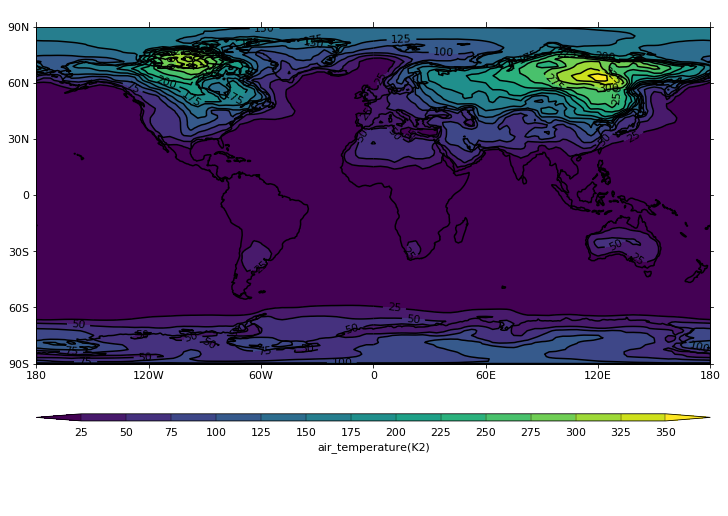

In [3]:
# Find the temporal variance at each XY location and plot the result
# (use the field's "collapse" method with the argument 'T: variance')
v = f.collapse('T: variance')
print(v)

%matplotlib inline

import cfplot as cfp
cfp.con(v)

In [4]:
# Find the time mean at each X-Y point
# (use the field's "collapse" method wit the argument 'T: mean')
t_mean = f.collapse('T: mean')
print(t_mean)

Field: air_temperature (ncvar%tas)
----------------------------------
Data            : air_temperature(time(1), latitude(145), longitude(192)) K
Cell methods    : time(1): mean (interval: 30 minutes)
Dimension coords: time(1) = [1964-12-01 00:00:00] 365_day
                : latitude(145) = [-90.0, ..., 90.0] degrees_north
                : longitude(192) = [0.0, ..., 358.125] degrees_east
                : height(1) = [2.0] m



In [5]:
# Calculate the global mean for each time and print the values for the first 12 times
# (use specify the operation as 'X: Y: mean', or equivalently 'area: mean')
x = f.collapse('X: Y: mean')
print(x.array[:12])

[[[275.14305112]]

 [[275.07955644]]

 [[275.08529227]]

 [[275.29717096]]

 [[276.82129897]]

 [[278.13823508]]

 [[279.43361836]]

 [[280.03470329]]

 [[279.58226719]]

 [[278.39334869]]

 [[276.5805792 ]]

 [[275.24783543]]]


In [6]:
# Calculate the weighted global mean for each time and print the valuesfor the first 12 times
# (use the "weights" parameter of the field's collapse method with the
# value ['X', 'Y'] or equivalently the value 'area')
x = f.collapse('area: mean', weights='area')
print(x.array[:12])

[[[283.8122294 ]]

 [[283.709302  ]]

 [[284.18888204]]

 [[284.96334437]]

 [[286.19907216]]

 [[286.96110774]]

 [[287.64243518]]

 [[288.18234269]]

 [[288.00099162]]

 [[287.25347405]]

 [[285.87638167]]

 [[284.57930887]]]


In [7]:
# For each time find the range spanned by the zonal weighted means 
# (use the argument "'X: mean Y: range'" and the parameter "weights='X'")
g = f.collapse('X: mean Y: range', weights='X')
print(g)
print(g.data)

Field: air_temperature (ncvar%tas)
----------------------------------
Data            : air_temperature(time(120), latitude(1), longitude(1)) K
Cell methods    : time(120): mean (interval: 30 minutes) longitude(1): mean latitude(1): range
Dimension coords: time(120) = [1959-12-16 12:00:00, ..., 1969-11-16 00:00:00] 365_day
                : latitude(1) = [0.0] degrees_north
                : longitude(1) = [179.0625] degrees_east
                : height(1) = [2.0] m

[[[53.71201165517169, ..., 65.12694808390887]]] K


In [8]:
# Find the weighted temporal minimum of the latitudinal maxima of the longitudinal means 
print(f)
g = f.collapse('X: mean Y: max T: minimum', weights=['X', 'Y', 'T'])
print(g.array)

Field: air_temperature (ncvar%tas)
----------------------------------
Data            : air_temperature(time(120), latitude(145), longitude(192)) K
Cell methods    : time(120): mean (interval: 30 minutes)
Dimension coords: time(120) = [1959-12-16 12:00:00, ..., 1969-11-16 00:00:00] 365_day
                : latitude(145) = [-90.0, ..., 90.0] degrees_north
                : longitude(192) = [0.0, ..., 358.125] degrees_east
                : height(1) = [2.0] m

[[[297.71326639]]]


## Calculate anomalies from the mean

In [9]:
# Find the time average at each X-Y location, weighted by month lengths
t_mean = f.collapse('T: mean', weights='T')
print(t_mean)

Field: air_temperature (ncvar%tas)
----------------------------------
Data            : air_temperature(time(1), latitude(145), longitude(192)) K
Cell methods    : time(1): mean (interval: 30 minutes)
Dimension coords: time(1) = [1964-12-01 00:00:00] 365_day
                : latitude(145) = [-90.0, ..., 90.0] degrees_north
                : longitude(192) = [0.0, ..., 358.125] degrees_east
                : height(1) = [2.0] m



https://ncas-cms.github.io/cf-python/analysis.html#arithmetical-operations

In [10]:
# For each element of the original field, calculate the anomaly from the temporal mean
# and print its array of values 
# (use simple subtraction)
t_anom = f - t_mean
print(t_anom)
print(t_anom.array)

Field: air_temperature (ncvar%tas)
----------------------------------
Data            : air_temperature(time(120), latitude(145), longitude(192)) K
Cell methods    : time(120): mean (interval: 30 minutes)
Dimension coords: time(120) = [1959-12-16 12:00:00, ..., 1969-11-16 00:00:00] 365_day
                : latitude(145) = [-90.0, ..., 90.0] degrees_north
                : longitude(192) = [0.0, ..., 358.125] degrees_east
                : height(1) = [2.0] m

[[[ 17.23374316  17.23374316  17.23374316 ...  17.23374316  17.23374316
    17.23374316]
  [ 15.1198893   15.11096985  15.10127152 ...  15.15195753  15.13956857
    15.13011486]
  [ 14.6592992   14.66458582  14.66969063 ...  14.62081899  14.61362175
    14.63668101]
  ...
  [ -8.06449489  -8.07036848  -8.07707876 ...  -8.03082001  -8.03393452
    -8.04885026]
  [ -7.99935323  -7.99810691  -7.99668703 ...  -7.99322772  -7.99598733
    -7.99775713]
  [ -8.4711552   -8.4711552   -8.4711552  ...  -8.4711552   -8.4711552
    -8.471155

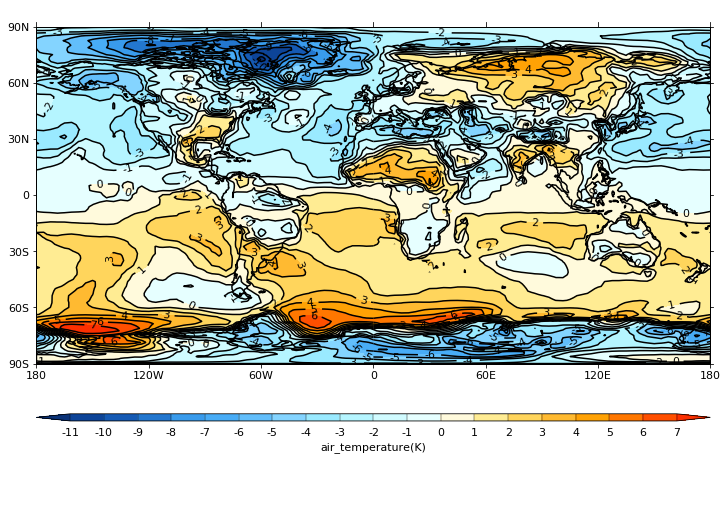

In [11]:
# Plot the anomaly from the mean for the month of April 1966
# (April 1966 may be specified as cf.month(4) & cf.year(1966))
cfp.con(t_anom.subspace(T=cf.month(4) & cf.year(1966)))

## Climatological time statistics
https://ncas-cms.github.io/cf-python/analysis.html#climatological-statistics

Field: air_temperature (ncvar%tas)
----------------------------------
Data            : air_temperature(time(4), latitude(145), longitude(192)) K
Cell methods    : time(4): mean (interval: 30 minutes) time(4): minimum within years time(4): mean over years
Dimension coords: time(4) = [1960-01-15 00:00:00, ..., 1960-10-16 12:00:00] 365_day
                : latitude(145) = [-90.0, ..., 90.0] degrees_north
                : longitude(192) = [0.0, ..., 358.125] degrees_east
                : height(1) = [2.0] m



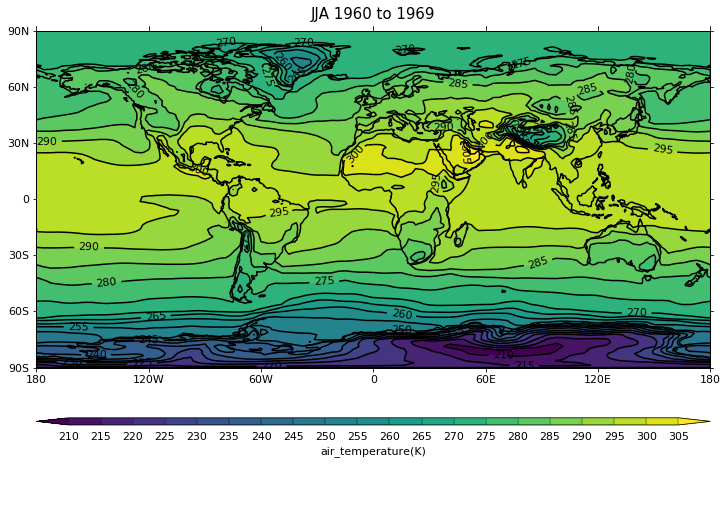

In [12]:
# Find the multiannual average of the seasonal (DJF, MAM, etc.) minima and plot the result for JJA 
# (use the special argument 'T: minimum within years T: mean over years' to the field's "collapse".
#  method. This also requires the "within_years" parameter to define over which periods to take
#  the minima within each year. Set this parameter to cf.seasons(), which will specify the
#  four seasons of DJF, MAM, JJA, SON)
g = f.collapse('T: minimum within years T: mean over years', within_years=cf.seasons())
print(g)
cfp.con(g.subspace(T=cf.month(cf.wi(6, 8))), title='JJA 1960 to 1969')

In [13]:
# Print the new field's time cordiante values and their bounds - note that the bounds span the full 10 years,
# but the coordinate values themselves lie in the correct season of the first year
print(g.coord('T').datetime_array)
print(g.coord('T').bounds.datetime_array)

[cftime.DatetimeNoLeap(1960-01-15 00:00:00)
 cftime.DatetimeNoLeap(1960-04-16 00:00:00)
 cftime.DatetimeNoLeap(1960-07-17 00:00:00)
 cftime.DatetimeNoLeap(1960-10-16 12:00:00)]
[[cftime.DatetimeNoLeap(1959-12-01 00:00:00)
  cftime.DatetimeNoLeap(1969-03-01 00:00:00)]
 [cftime.DatetimeNoLeap(1960-03-01 00:00:00)
  cftime.DatetimeNoLeap(1969-06-01 00:00:00)]
 [cftime.DatetimeNoLeap(1960-06-01 00:00:00)
  cftime.DatetimeNoLeap(1969-09-01 00:00:00)]
 [cftime.DatetimeNoLeap(1960-09-01 00:00:00)
  cftime.DatetimeNoLeap(1969-12-01 00:00:00)]]


## Cell methods: describing the variation of the quantity within cells
https://ncas-cms.github.io/cf-python/attribute/cf.Field.cell_methods.html

In [14]:
# Inspect the original and new fields' cell methods, that describe the variation of the
# quantity within cells, i.e. a record of the collapses that have been performed
# (use the cell_methods attribute of the field)
print(f.cell_methods)
print(g.cell_methods)

Constructs:
{'cellmethod0': <CF CellMethod: domainaxis0: mean (interval: 30 minutes)>}
Constructs:
{'cellmethod0': <CF CellMethod: domainaxis0: mean (interval: 30 minutes)>,
 'cellmethod1': <CF CellMethod: domainaxis0: minimum within years>,
 'cellmethod2': <CF CellMethod: domainaxis0: mean over years>}


## Cell areas and weights

Field: cell_area
----------------
Data            : cell_area(latitude(145), longitude(192)) m2
Dimension coords: latitude(145) = [-90.0, ..., 90.0] degrees_north
                : longitude(192) = [0.0, ..., 358.125] degrees_east

[[7.90324668e+07 7.90324668e+07 7.90324668e+07 ... 7.90324668e+07
  7.90324668e+07 7.90324668e+07]
 [6.32203311e+08 6.32203311e+08 6.32203311e+08 ... 6.32203311e+08
  6.32203311e+08 6.32203311e+08]
 [1.26410573e+09 1.26410573e+09 1.26410573e+09 ... 1.26410573e+09
  1.26410573e+09 1.26410573e+09]
 ...
 [1.26410573e+09 1.26410573e+09 1.26410573e+09 ... 1.26410573e+09
  1.26410573e+09 1.26410573e+09]
 [6.32203311e+08 6.32203311e+08 6.32203311e+08 ... 6.32203311e+08
  6.32203311e+08 6.32203311e+08]
 [7.90324668e+07 7.90324668e+07 7.90324668e+07 ... 7.90324668e+07
  7.90324668e+07 7.90324668e+07]]
index is  0 0 1806333227.5531263


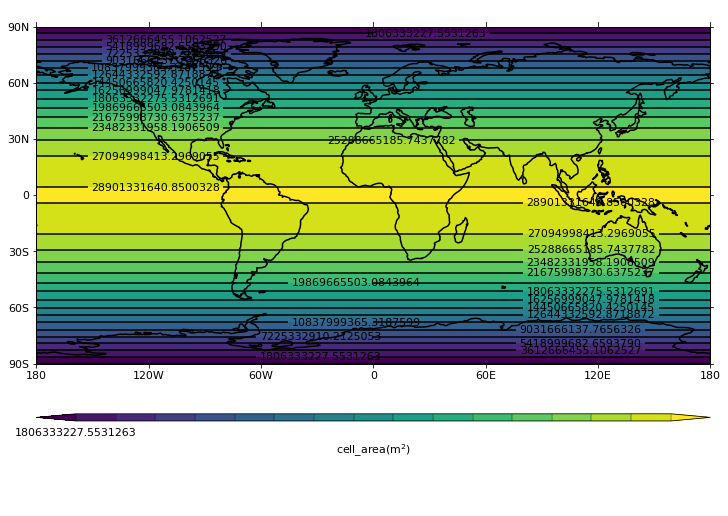

In [15]:
# Find and plot the horizontal cell areas of the field
# (use the field's "cell_area" method)
area = f.cell_area()
print(area)
print(area.array)
cfp.con(area)

Field: long_name=weights
------------------------
Data            : long_name=weights(time(120)) d
Dimension coords: time(120) = [1959-12-16 12:00:00, ..., 1969-11-16 00:00:00] 365_day

[31. 31. 28. 31. 30. 31. 30. 31. 31. 30. 31. 30. 31. 31. 28. 31. 30. 31.
 30. 31. 31. 30. 31. 30. 31. 31. 28. 31. 30. 31. 30. 31. 31. 30. 31. 30.
 31. 31. 28. 31. 30. 31. 30. 31. 31. 30. 31. 30. 31. 31. 28. 31. 30. 31.
 30. 31. 31. 30. 31. 30. 31. 31. 28. 31. 30. 31. 30. 31. 31. 30. 31. 30.
 31. 31. 28. 31. 30. 31. 30. 31. 31. 30. 31. 30. 31. 31. 28. 31. 30. 31.
 30. 31. 31. 30. 31. 30. 31. 31. 28. 31. 30. 31. 30. 31. 31. 30. 31. 30.
 31. 31. 28. 31. 30. 31. 30. 31. 31. 30. 31. 30.]


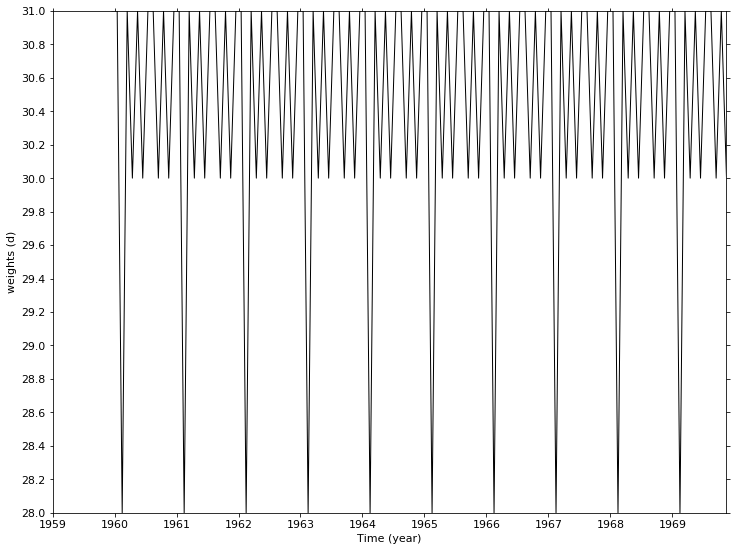

In [16]:
# Find the weights used in time axis collapses
# (use the field's weights method and teh cfp.lineplot function on the result)
w = f.weights('T')
print(w)
print(w.array)
cfp.lineplot(w)

In [17]:
# Find the weights used in area collapses
# (use the field's weights method)
w = f.weights('area')
print(w)
print(w.array)

Field: long_name=weights
------------------------
Data            : long_name=weights(latitude(145), longitude(192)) rad
Dimension coords: latitude(145) = [-90.0, ..., 90.0] degrees_north
                : longitude(192) = [0.0, ..., 358.125] degrees_east

[[1.94696932e-06 1.94696932e-06 1.94696932e-06 ... 1.94696932e-06
  1.94696932e-06 1.94696932e-06]
 [1.55743645e-05 1.55743645e-05 1.55743645e-05 ... 1.55743645e-05
  1.55743645e-05 1.55743645e-05]
 [3.11413165e-05 3.11413165e-05 3.11413165e-05 ... 3.11413165e-05
  3.11413165e-05 3.11413165e-05]
 ...
 [3.11413165e-05 3.11413165e-05 3.11413165e-05 ... 3.11413165e-05
  3.11413165e-05 3.11413165e-05]
 [1.55743645e-05 1.55743645e-05 1.55743645e-05 ... 1.55743645e-05
  1.55743645e-05 1.55743645e-05]
 [1.94696932e-06 1.94696932e-06 1.94696932e-06 ... 1.94696932e-06
  1.94696932e-06 1.94696932e-06]]


https://ncas-cms.github.io/cf-python/method/cf.Field.collapse.html

In [18]:
# Look at the help page for the collapse method
help(f.collapse)

Help on method collapse in module cf.field:

collapse(method, axes=None, squeeze=False, mtol=1, weights=None, ddof=1, a=None, inplace=False, group=None, regroup=False, within_days=None, within_years=None, over_days=None, over_years=None, coordinate='mid_range', group_by='coords', group_span=None, group_contiguous=None, measure=False, scale=None, radius='earth', verbose=False, _create_zero_size_cell_bounds=False, _update_cell_methods=True, i=False, _debug=False, **kwargs) method of cf.field.Field instance
    Collapse axes of the field.
    
    Collapsing one or more dimensions reduces their size and replaces
    the data along those axes with representative statistical
    values. The result is a new field construct with consistent
    metadata for the collapsed values.
    
    Collapsing an axis involves reducing its size with a given
    (typically statistical) method.
    
    By default all axes with size greater than 1 are collapsed
    completely (i.e. to size 1) with a given c